# EDA (Exploratory Data Analysis) del dataset de los viajes de los taxis amarillos durante el mes de septiembre de 2024

## Paso 0: Importar librerias necesarias para el EDA y cargar el dataset que será analizado.

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

* Pandas y NumPy para el manejo de la data.
* Matplotlib y seaborn para la visualizacion de los gráficos pertinentes.
* Warnings para legibilidad del código y visualizaciones.

In [2]:
yellow_tripdata_sample = pd.read_parquet('../yellow_tripdata_2024-09.parquet')
yellow_tripdata_sample.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-09-01 00:05:51,2024-09-01 00:45:03,1.0,9.80,1.0,N,138,48,1,47.8,10.25,0.5,13.30,6.94,1.0,79.79,2.5,1.75
1,1,2024-09-01 00:59:35,2024-09-01 01:03:43,1.0,0.50,1.0,N,140,141,1,5.1,3.50,0.5,3.00,0.00,1.0,13.10,2.5,0.00
2,2,2024-09-01 00:25:00,2024-09-01 00:34:37,2.0,2.29,1.0,N,238,152,2,13.5,1.00,0.5,0.00,0.00,1.0,16.00,0.0,0.00
3,2,2024-09-01 00:31:00,2024-09-01 00:46:52,1.0,5.20,1.0,N,93,130,1,24.7,1.00,0.5,4.55,0.00,1.0,31.75,0.0,0.00
4,2,2024-09-01 00:11:57,2024-09-01 00:30:41,2.0,2.26,1.0,N,79,231,1,17.0,1.00,0.5,4.40,0.00,1.0,26.40,2.5,0.00


El presente análisis se realizará sobre una pequeña muestra de los viajes (sept-2024) para observar la calidad de los datos recabados.

# Paso 1: Exploracion de los datos
* valores erróneos
* valores nulos
* valores duplicados
* valores faltantes

In [3]:
yellow_tripdata_sample.shape

(3633030, 19)

El dataset contiene 3.633.030 filas, que representan los viajes realizados durante el mes de septiembre de 2024, y 19 columnas

In [4]:
yellow_tripdata_sample.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

En líneas generales, la informacion en las columnas de este dataset contienen lo siguiente:

* Proveedor tecnológico que generó el viaje y suministró la data (VendorID).
* Hora y fecha donde comenzó y terminó el viaje (tpep_pickup_datetime y tpep_dropoff_datetime).
* Numero de pasajeros reportado por el conductor (passenger_count).
* Distance recorrida durante el viaje (trip_distance).
* Tipo de tarifa aplicada al terminar el viaje (RatecodeID).
* Si la informacion del viaje fue suministrada al momento, o si fue almacenada en memoria del vehiculo por no tener conexion con el servidor (store_and_fwd_flag).
* Zona TLC donde comenzó y terminó el viaje (PULocationID y DOLocationID).
* Forma de pago del pasajero (payment_type)
* Tarifa base del viaje (fare_amount)
* Cargos extra asociados al viaje (extra, mta_tax, tolls_amount, improvement_surcharge, congestion_surcharge y Airport_fee)
* Propina (tip_amount)
* Tarifa total pagada por el pasajero (total_amount)

En resumen, se tiene informacion detallada sobre todos los viajes realizados durante el mes de septiembre de 2024 que incluyen principalmente tiempo, distancia, ubicaciones y costo del viaje.

In [5]:
yellow_tripdata_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633030 entries, 0 to 3633029
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

Aquí se puede observar que el tipo de dato es acorde a la informacion que posee.

A continuación se ordenara la data de acuerdo a la hora y fecha que comienza el viaje

In [6]:
yellow_tripdata_sample.sort_values(by=['tpep_pickup_datetime'])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
2931345,2,2008-12-31 23:03:46,2009-01-01 20:25:11,1.0,0.71,1.0,N,163,237,2,7.2,1.0,0.5,0.00,0.00,1.0,12.20,2.5,0.00
317822,2,2008-12-31 23:05:26,2009-01-01 19:10:54,1.0,17.86,2.0,N,132,100,1,70.0,5.0,0.5,17.54,6.94,1.0,105.23,2.5,1.75
1768175,2,2009-01-01 14:02:23,2009-01-01 14:28:23,2.0,2.05,1.0,N,68,230,1,22.6,0.0,0.5,6.65,0.00,1.0,33.25,2.5,0.00
2168,2,2024-08-31 22:27:55,2024-08-31 22:51:40,1.0,7.77,1.0,N,141,235,1,34.5,1.0,0.5,7.90,0.00,1.0,47.40,2.5,0.00
2169,2,2024-08-31 23:16:36,2024-08-31 23:36:03,1.0,3.58,1.0,N,166,237,1,21.9,1.0,0.5,5.38,0.00,1.0,32.28,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121196,2,2024-10-01 18:55:43,2024-10-01 19:48:40,1.0,19.01,2.0,N,132,142,1,70.0,5.0,0.5,17.54,6.94,1.0,105.23,2.5,1.75
3126922,2,2024-10-01 19:42:58,2024-10-01 19:50:35,1.0,1.52,1.0,N,141,236,1,9.3,2.5,0.5,3.16,0.00,1.0,18.96,2.5,0.00
3126923,2,2024-10-01 19:57:24,2024-10-01 20:02:53,1.0,0.72,1.0,N,237,163,1,7.2,2.5,0.5,2.74,0.00,1.0,16.44,2.5,0.00
3133259,2,2024-10-01 20:58:22,2024-10-01 21:16:12,1.0,3.01,1.0,N,186,148,1,18.4,1.0,0.5,4.68,0.00,1.0,28.08,2.5,0.00


Se observa que el dataset tiene algunos valores inesperados, entre ellos unos correspondientes a años que no son 2024, y otros que corresponden a un mes que no es septiembre. A continuación se observará en mayor detalle estos valores.

In [7]:
yellow_tripdata_sample[yellow_tripdata_sample['tpep_pickup_datetime'].dt.year!=2024]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
317822,2,2008-12-31 23:05:26,2009-01-01 19:10:54,1.0,17.86,2.0,N,132,100,1,70.0,5.0,0.5,17.54,6.94,1.0,105.23,2.5,1.75
1768175,2,2009-01-01 14:02:23,2009-01-01 14:28:23,2.0,2.05,1.0,N,68,230,1,22.6,0.0,0.5,6.65,0.00,1.0,33.25,2.5,0.00
2931345,2,2008-12-31 23:03:46,2009-01-01 20:25:11,1.0,0.71,1.0,N,163,237,2,7.2,1.0,0.5,0.00,0.00,1.0,12.20,2.5,0.00


Se tiene que hay 3 valores que no son del año 2024, por lo que podemos considerarlos erroneos ya que no deberian estar en este dataset. Se procederá a eliminarlos.

In [8]:
yellow_tripdata_sample = yellow_tripdata_sample[yellow_tripdata_sample['tpep_pickup_datetime'].dt.year==2024]
yellow_tripdata_sample.shape

(3633027, 19)

El numero de filas indica que los datos erróneos han sido eliminados correctamente.

In [9]:
yellow_tripdata_sample[yellow_tripdata_sample['tpep_pickup_datetime'].dt.month!=9]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
117,2,2024-08-31 23:58:35,2024-09-01 00:11:49,1.0,2.01,1.0,N,164,148,1,14.2,1.0,0.5,2.00,0.00,1.0,21.20,2.5,0.00
249,2,2024-08-31 23:54:44,2024-08-31 23:57:27,1.0,0.25,1.0,N,231,231,1,4.4,1.0,0.5,1.88,0.00,1.0,11.28,2.5,0.00
261,2,2024-08-31 23:57:52,2024-09-01 00:29:43,1.0,18.05,2.0,N,132,42,1,70.0,0.0,0.5,12.03,6.94,1.0,92.22,0.0,1.75
308,2,2024-08-31 23:54:28,2024-09-01 00:06:43,1.0,1.23,1.0,N,230,162,2,12.1,1.0,0.5,0.00,0.00,1.0,17.10,2.5,0.00
359,2,2024-08-31 23:41:24,2024-09-01 00:01:24,1.0,5.44,1.0,N,100,42,1,25.4,1.0,0.5,2.00,0.00,1.0,32.40,2.5,0.00
366,2,2024-08-31 23:31:22,2024-08-31 23:49:22,2.0,4.63,1.0,N,79,262,2,21.9,1.0,0.5,0.00,0.00,1.0,26.90,2.5,0.00
367,2,2024-08-31 23:57:10,2024-09-01 00:05:57,1.0,1.61,1.0,N,141,239,1,10.7,1.0,0.5,3.14,0.00,1.0,18.84,2.5,0.00
368,2,2024-08-31 23:47:06,2024-08-31 23:56:46,6.0,2.34,1.0,N,142,162,1,12.8,1.0,0.5,3.56,0.00,1.0,21.36,2.5,0.00
390,2,2024-08-31 23:53:06,2024-08-31 23:54:41,1.0,0.13,1.0,N,48,48,2,3.7,1.0,0.5,0.00,0.00,1.0,8.70,2.5,0.00
460,2,2024-08-31 23:59:11,2024-09-01 00:12:48,2.0,2.55,1.0,N,249,87,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.00


En este caso los valores que no son del mes de septiembre son de viajes minutos antes o despues (ultimos viajes de agosto y primeros viajes de octubre). Como pertenecen a los extremos del rango de tiempo utilizado, se conservarán.

Como nota hay que destacar que al momento de utilizar y combinar datasets de diferentes meses **hay que corroborar que datos como estos no terminen duplicados**.

In [10]:
yellow_tripdata_sample.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          483731
trip_distance                 0
RatecodeID               483731
store_and_fwd_flag       483731
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     483731
Airport_fee              483731
dtype: int64

Aca se observa el numero de valores nulos encontrados por cada columna. Tenemos que:

* Solo hay valores nulos en las columnas correspondientes a número de pasajeros, tipo de tarifa, envio o almacenamiento de la información del viaje, cargo por trafico y cargo por aeropuerto.
* Para el resto de columnas no hay valores nulos.
* El numero de valores nulos en las columnas mencionadas es el mismo. Se revisará si corresponden a las mismas filas.

In [11]:
yellow_tripdata_sample.shape[0] - yellow_tripdata_sample.dropna().shape[0]

483731

Con el calculo anterior se corrobora que todos los nulos se encuentran en las mismas filas.

A continuación se estudiara un poco mas en detalle esos valores nulos.

In [12]:
yellow_tripdata_sample[yellow_tripdata_sample['passenger_count'].isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3149299,1,2024-09-01 00:47:27,2024-09-01 00:54:09,NaN,1.10,NaN,None,170,234,0,20.29,0.0,0.5,0.00,0.00,1.0,24.29,NaN,NaN
3149300,2,2024-09-01 00:24:34,2024-09-01 00:40:05,NaN,2.77,NaN,None,4,246,0,16.66,0.0,0.5,0.00,0.00,1.0,20.66,NaN,NaN
3149301,2,2024-09-01 00:53:15,2024-09-01 01:03:33,NaN,2.17,NaN,None,249,261,0,11.37,0.0,0.5,0.00,0.00,1.0,15.37,NaN,NaN
3149302,2,2024-09-01 00:22:31,2024-09-01 00:34:38,NaN,2.81,NaN,None,255,145,0,16.12,0.0,0.5,3.52,0.00,1.0,21.14,NaN,NaN
3149303,2,2024-09-01 00:24:39,2024-09-01 00:43:12,NaN,4.56,NaN,None,61,76,0,21.25,0.0,0.5,0.00,0.00,1.0,22.75,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633025,2,2024-09-30 23:14:05,2024-09-30 23:47:48,NaN,14.88,NaN,None,181,179,0,45.69,0.0,0.5,0.00,0.00,1.0,47.19,NaN,NaN
3633026,1,2024-09-30 23:29:30,2024-10-01 00:41:40,NaN,0.00,NaN,None,230,10,0,60.00,2.0,0.5,0.00,6.94,1.0,74.94,NaN,NaN
3633027,1,2024-09-30 23:48:10,2024-09-30 23:57:09,NaN,1.10,NaN,None,41,152,0,7.32,0.0,0.5,0.00,0.00,1.0,8.82,NaN,NaN
3633028,2,2024-09-30 23:02:31,2024-09-30 23:29:30,NaN,9.25,NaN,None,40,198,0,33.01,0.0,0.5,0.00,0.00,1.0,34.51,NaN,NaN


En las primeras y últimas filas de este subconjunto de datos nulos, resalta que el tipo de pago es '0', el cual no es un tipo de pago enlistado en el diccionario de datos, el cual contiene etiquetas que van del 1 al 6.

In [13]:
yellow_tripdata_sample[yellow_tripdata_sample['passenger_count'].isnull()]['payment_type'].unique().tolist()

[0]

Aquí se corrobora que para todos las filas con valores nulos, el tipo de pago es '0'.

**Para efectos de los objetivos y producto a entregar en el presente proyecto, estos valores faltantes no tienen ningun efecto, ya que las principales columnas necesarias son las que contienen información acerca de la hora, fecha y lugar del inicio y fin de los viajes**

In [14]:
yellow_tripdata_sample.duplicated().sum()

0

No hay valores duplicados en el dataset

Ahora se procederá a evaluar algunos valores por columna.

Para ciertas columnas, un valor cero o negativo no tiene sentido, a continuación se evaluaran algunos de ellos:

In [15]:
print(f'Viajes con 0 pasajeros: {yellow_tripdata_sample[yellow_tripdata_sample['passenger_count'] == 0].shape[0]}')
print(f'Viajes con numero "negativo" pasajeros: {yellow_tripdata_sample[yellow_tripdata_sample['passenger_count'] < 0].shape[0]}')

Viajes con 0 pasajeros: 30346
Viajes con numero "negativo" pasajeros: 0


No hay valores con numero de pasajeros negativo, pero hay 30.346 viajes donde se reporta que hay 0 pasajeros viajando.

Hay que tomar en cuenta que segun el diccionario de la fuente de los datos, estos valores son suministrados por los conductores.

In [16]:
print(f'Viajes con distancia 0: {yellow_tripdata_sample[yellow_tripdata_sample['trip_distance'] == 0].shape[0]}')
print(f'Viajes con distancia "negativa": {yellow_tripdata_sample[yellow_tripdata_sample['trip_distance'] < 0].shape[0]}')

Viajes con distancia 0: 81121
Viajes con distancia "negativa": 0


No hay distancias recorridas negativas pero si hay distancias "cero" (81.121 viajes).
Estos valores (fecha, hora y ubicacion) se inician y terminan cuando el taximetro es activado por el conductor, lo que puede indicar error por parte del taxista a la hora de activar el dispositivo.

In [17]:
print(yellow_tripdata_sample[yellow_tripdata_sample['PULocationID'] <= 0].shape)
print(yellow_tripdata_sample[yellow_tripdata_sample['DOLocationID'] <= 0].shape)

(0, 19)
(0, 19)


No hay valores cero o negativos de ubicacion inicial y final.

In [18]:
print(f'Viajes con tarifa 0: {yellow_tripdata_sample[yellow_tripdata_sample['fare_amount'] == 0].shape[0]}')
print(f'Viajes con tarifa "negativa": {yellow_tripdata_sample[yellow_tripdata_sample['fare_amount'] < 0].shape[0]}')

Viajes con tarifa 0: 1693
Viajes con tarifa "negativa": 73084


Los viajes con tarifas negativas pudieran significar que son retornos, pero no se tiene información extra al respecto para confirmar.

De igual forma, los viajes con tarifas 0 pudieran representar viajes cancelados.

In [19]:
print(f'Viajes con pago total 0: {yellow_tripdata_sample[yellow_tripdata_sample['total_amount'] == 0].shape[0]}')
print(f'Viajes con pago total "negativo": {yellow_tripdata_sample[yellow_tripdata_sample['total_amount'] < 0].shape[0]}')

Viajes con pago total 0: 431
Viajes con pago total "negativo": 56109


Al igual que con las tarifas, no se tiene información explícita sobre que pudieran representar estos valores.

Otra cosa a resaltar es que la cantidad de viajes con estos valores inesperados no es la misma que con el caso de las tarifas, sino menos, lo que significa que los otros cargos (impuestos, sobrecargos, etc) compensan la tarifa base en algunos casos.

# Paso 2: Gráficos

A continuación pasaremos a mostrar graficamente algunas distribuciones presentes en los datos

Para el producto ML que se presentará, los valores mas relevantes son la fecha, hora, y ubicacion, por lo que mostraremos los graficos de distribución considerando esos valores

In [20]:
yellow_tripdata_sample['weekday']= yellow_tripdata_sample['tpep_pickup_datetime'].dt.day_name()
yellow_tripdata_sample.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,weekday
0,1,2024-09-01 00:05:51,2024-09-01 00:45:03,1.0,9.80,1.0,N,138,48,1,47.8,10.25,0.5,13.30,6.94,1.0,79.79,2.5,1.75,Sunday
1,1,2024-09-01 00:59:35,2024-09-01 01:03:43,1.0,0.50,1.0,N,140,141,1,5.1,3.50,0.5,3.00,0.00,1.0,13.10,2.5,0.00,Sunday
2,2,2024-09-01 00:25:00,2024-09-01 00:34:37,2.0,2.29,1.0,N,238,152,2,13.5,1.00,0.5,0.00,0.00,1.0,16.00,0.0,0.00,Sunday
3,2,2024-09-01 00:31:00,2024-09-01 00:46:52,1.0,5.20,1.0,N,93,130,1,24.7,1.00,0.5,4.55,0.00,1.0,31.75,0.0,0.00,Sunday
4,2,2024-09-01 00:11:57,2024-09-01 00:30:41,2.0,2.26,1.0,N,79,231,1,17.0,1.00,0.5,4.40,0.00,1.0,26.40,2.5,0.00,Sunday


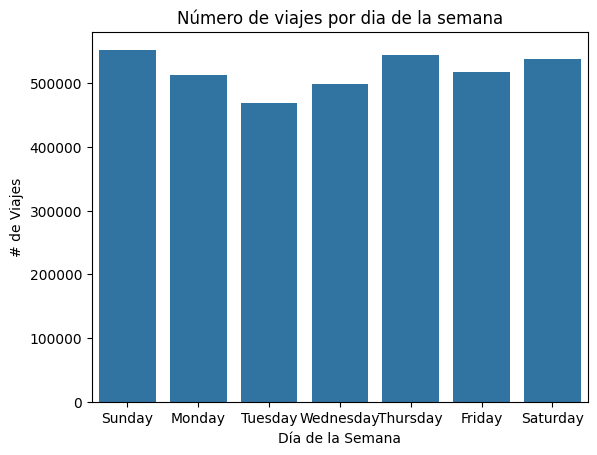

In [21]:
sns.countplot(data=yellow_tripdata_sample,x='weekday',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.rcParams["figure.figsize"] = (14,6)
plt.title('Número de viajes por dia de la semana') 
plt.xlabel('Día de la Semana')
plt.ylabel('# de Viajes')
plt.show()

### Se observa que, en general, la cantidad de viajes durante la semana es homogénea, con un minimo los dias martes y máximos los días jueves y domingos

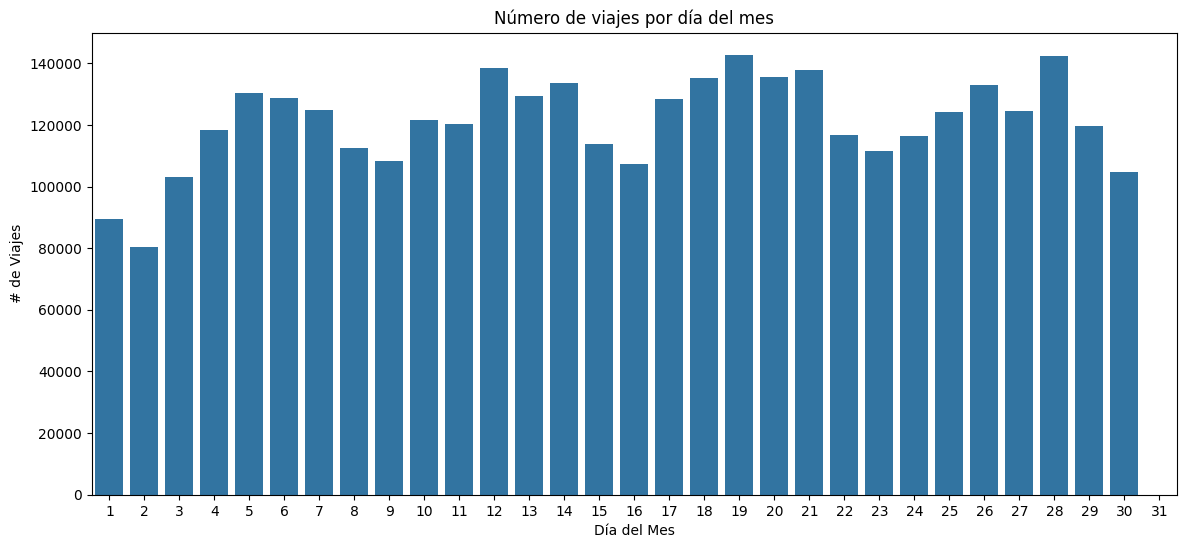

In [22]:
sns.countplot(data=yellow_tripdata_sample,x=yellow_tripdata_sample['tpep_pickup_datetime'].dt.day)
plt.rcParams["figure.figsize"] = (14,6)
plt.title('Número de viajes por día del mes') 
plt.xlabel('Día del Mes')
plt.ylabel('# de Viajes')
plt.show()

### Se observa una tendencia oscilante que va acorde con el comportamiento de la cantidad de viajes observado durante los dias de la semana

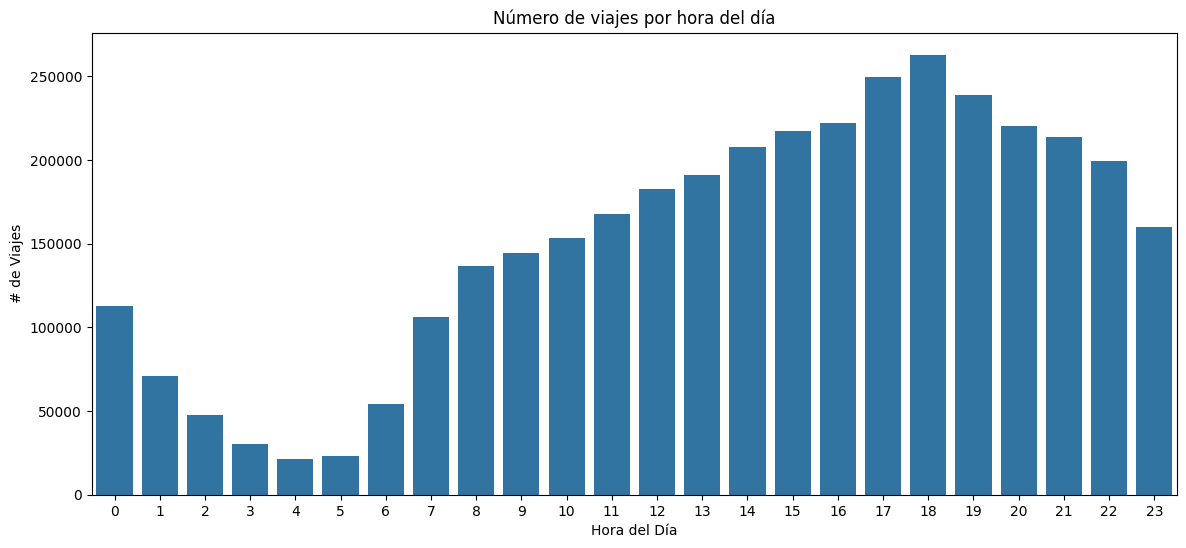

In [23]:
sns.countplot(data=yellow_tripdata_sample,x=yellow_tripdata_sample['tpep_pickup_datetime'].dt.hour)
plt.title('Número de viajes por hora del día') 
plt.xlabel('Hora del Día')
plt.ylabel('# de Viajes')
plt.show()

### Al examinar el numero de viajes durante el día, comenzamos en un minimo de viajes a partir de las 4-5am que comienza a crecer hasta llegar a un pico a las 6pm, donde luego comienza a descender nuevamente.

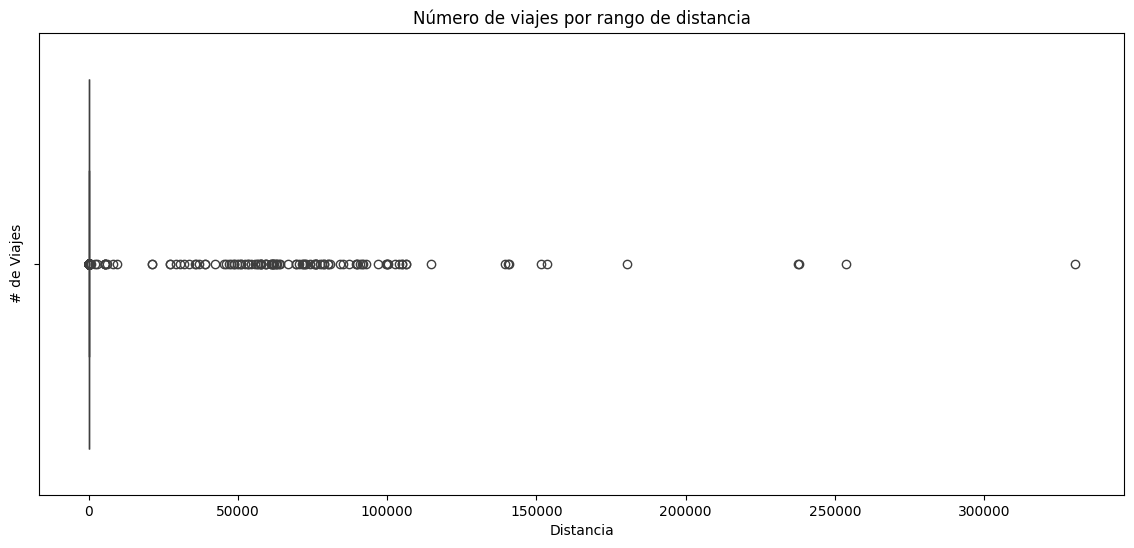

In [24]:
sns.boxplot(x=yellow_tripdata_sample['trip_distance'])
plt.title('Número de viajes por rango de distancia') 
plt.xlabel('Distancia')
plt.ylabel('# de Viajes')
plt.show()

### Para las distancias recorridas, claramente se ve que hay valores que distorsionan fuertemente el diagrama
### Se realizara un filtro donde se conservara solamente aquellos valores razonables

In [25]:
yellow_tripdata_sample['trip_distance'].describe()

count    3.633027e+06
mean     5.741468e+00
std      4.940950e+02
min      0.000000e+00
25%      1.030000e+00
50%      1.800000e+00
75%      3.500000e+00
max      3.303976e+05
Name: trip_distance, dtype: float64

### El 75% de la data esta entre 0 y 35 millas, por lo que se extraerá los valores mayores a 0 y menores e iguales a 35 para realizar el boxplot

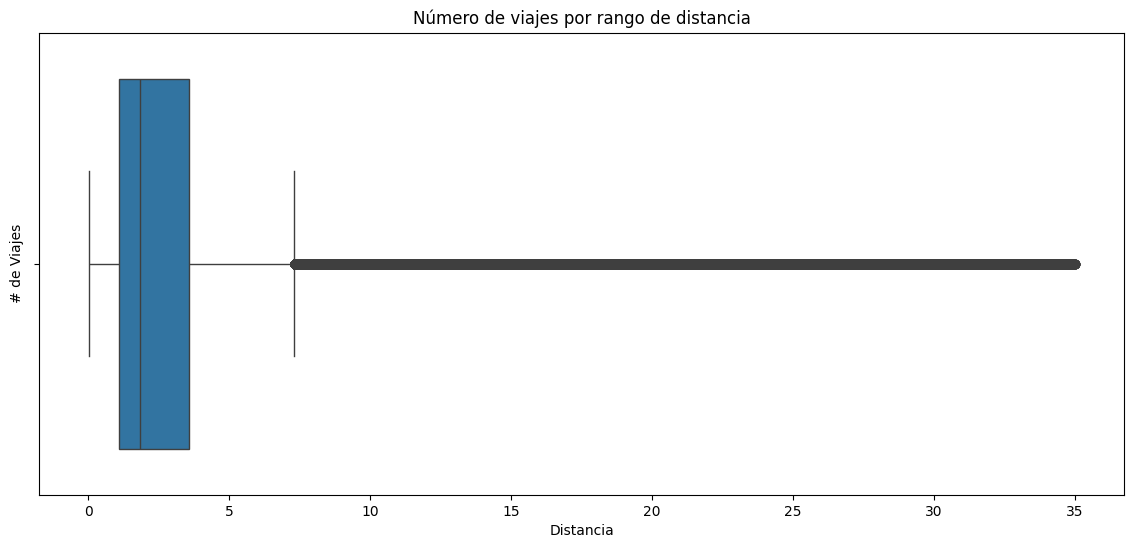

In [26]:
trip_distance_75 = yellow_tripdata_sample[(yellow_tripdata_sample['trip_distance']>0)&(yellow_tripdata_sample['trip_distance']<=35)].copy()

sns.boxplot(x=trip_distance_75['trip_distance'])
plt.title('Número de viajes por rango de distancia') 
plt.xlabel('Distancia')
plt.ylabel('# de Viajes')
plt.show()

### Con este primer filtro se observa que la mayoria se encuentra entre 0 y 6-7 millas, por lo que se hará una reduccion mayor con este nuevo rango.

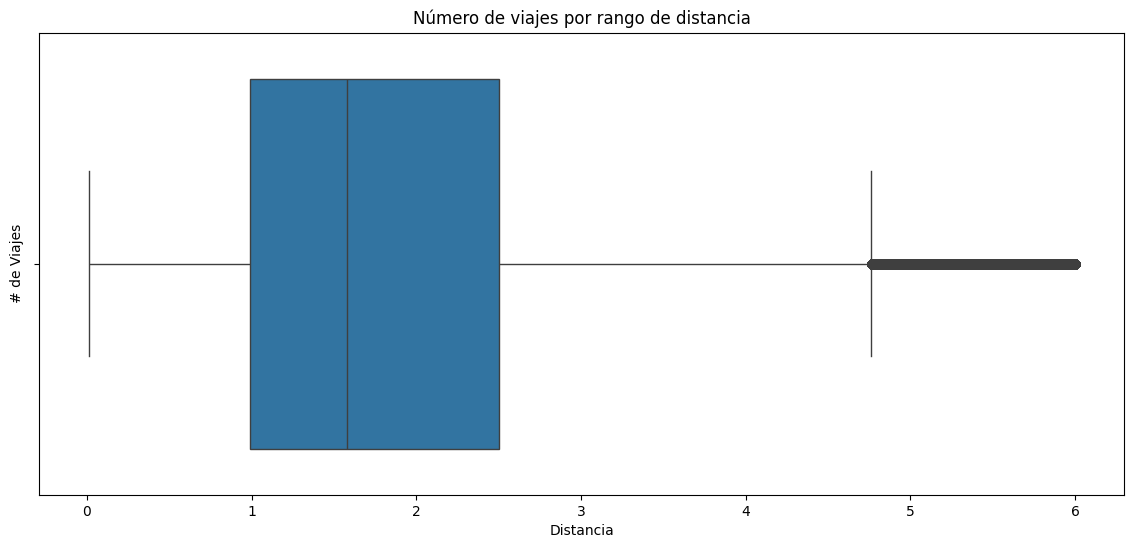

In [27]:
trip_distance_0_6 = yellow_tripdata_sample[(yellow_tripdata_sample['trip_distance']>0)&(yellow_tripdata_sample['trip_distance']<=6)].copy()

sns.boxplot(x=trip_distance_0_6['trip_distance'])
plt.title('Número de viajes por rango de distancia') 
plt.xlabel('Distancia')
plt.ylabel('# de Viajes')
plt.show()

### Aquí se observa una distribución mas razonable. Con este nuevo rango se pueden visualizar los histogramas:

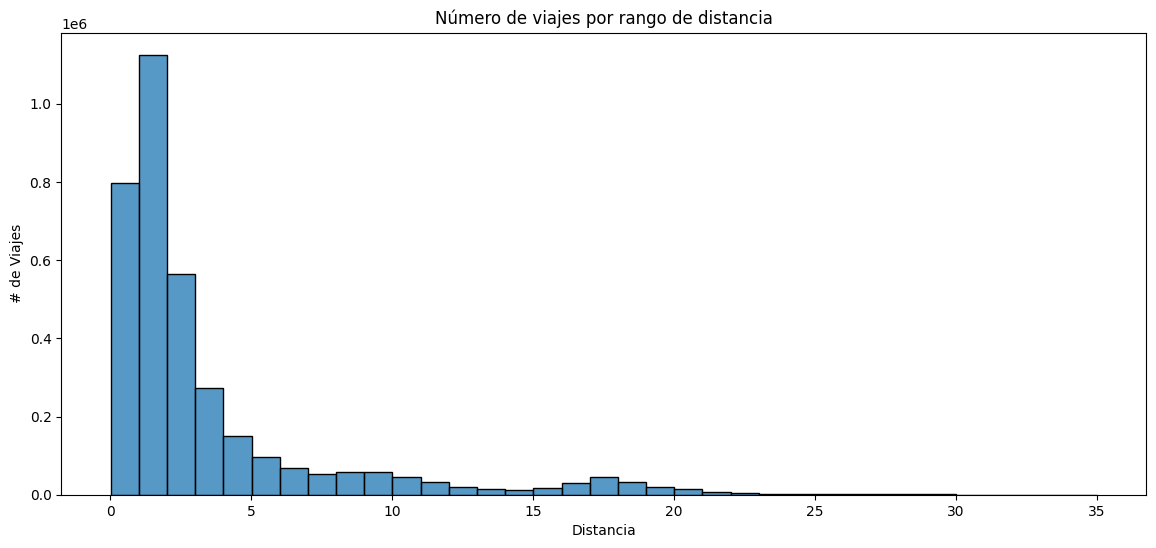

In [28]:
sns.histplot(data=trip_distance_75,x='trip_distance', binwidth=1)
plt.title('Número de viajes por rango de distancia') 
plt.xlabel('Distancia')
plt.ylabel('# de Viajes')
plt.show()

### Se observa que la cantidad de viajes por encima de las 10 millas es muy poca, con un pequeño repunte alrededor de las 17-18 millas. La gran mayoria se encuentra en las primeras 5 millas, como se ve a continuación.

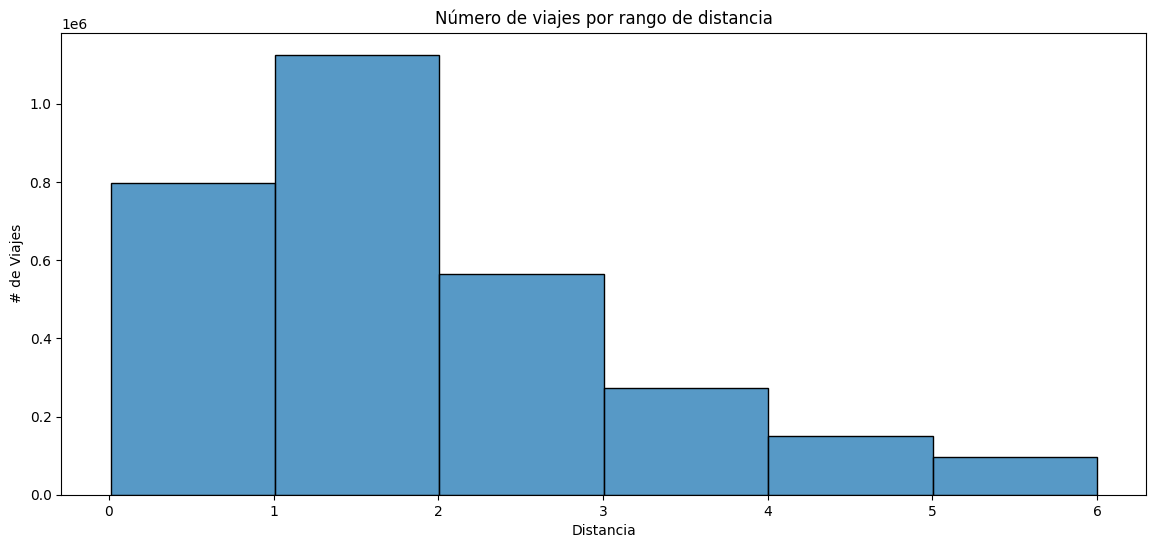

In [29]:
sns.histplot(data=trip_distance_0_6,x='trip_distance', binwidth=1)
plt.title('Número de viajes por rango de distancia') 
plt.xlabel('Distancia')
plt.ylabel('# de Viajes')
plt.show()

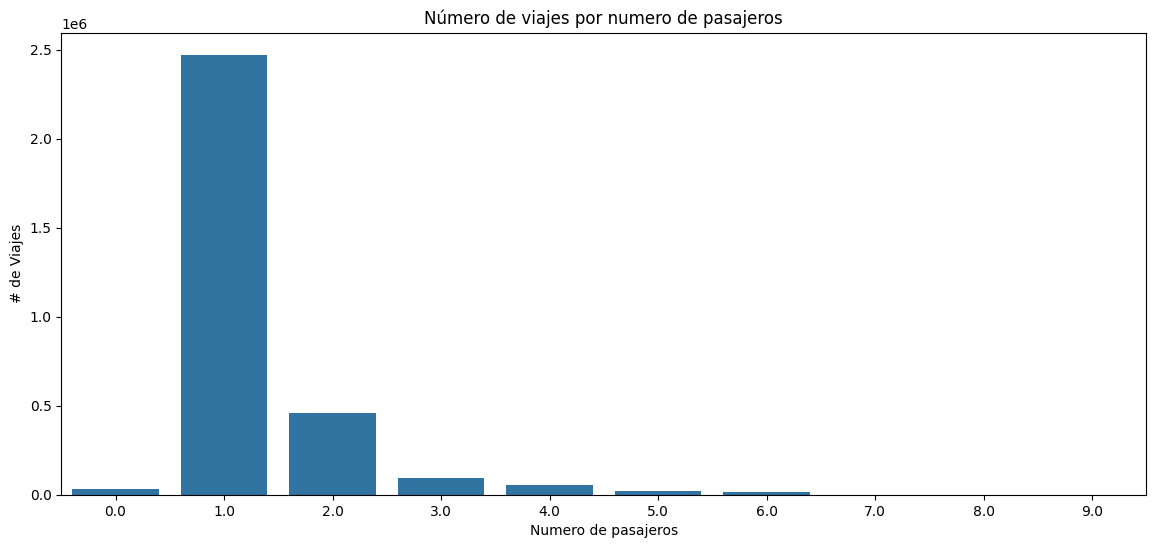

In [30]:
sns.countplot(data=yellow_tripdata_sample,x='passenger_count')
plt.title('Número de viajes por numero de pasajeros') 
plt.xlabel('Numero de pasajeros')
plt.ylabel('# de Viajes')
plt.show()

### Acá se observa que la gran mayoría de los viajes son de 1 solo pasajero. Se observa también viajes de "cero" pasajeros. La fuente de datos indica que este valor es introducido por el conductor, puede significar un error o representar un "envío de paquete" en el caso de que la compañía ofrezca ese servicio.

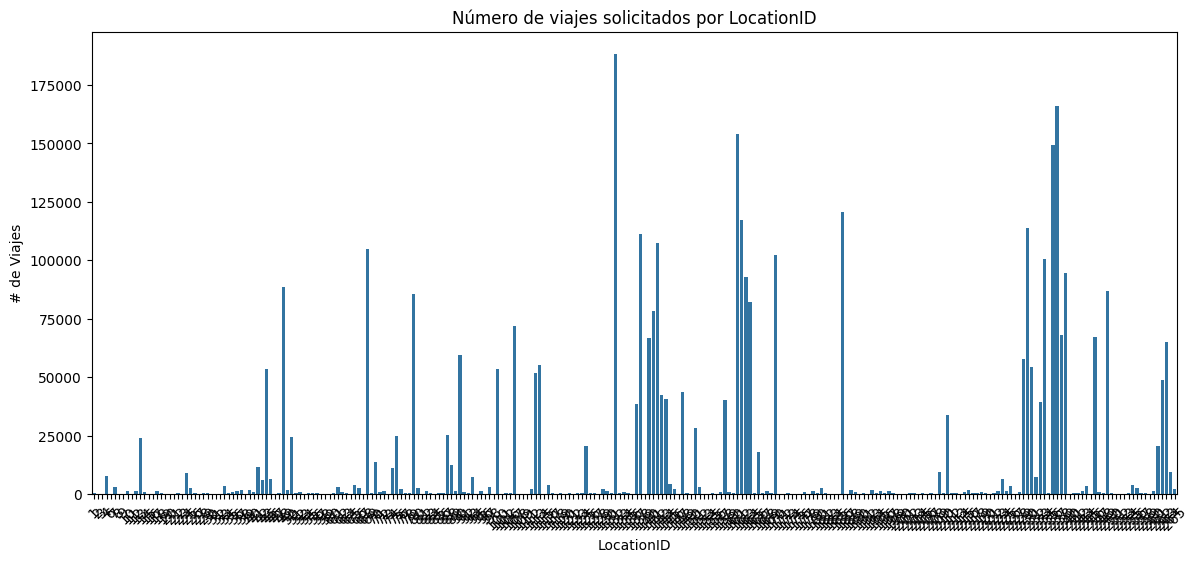

In [31]:
sns.countplot(data=yellow_tripdata_sample,x='PULocationID')
plt.title('Número de viajes solicitados por LocationID') 
plt.xlabel('LocationID')
plt.ylabel('# de Viajes')
plt.xticks(rotation=45)
plt.show()

### Acá se puede observar la cantidad de viajes solicitados por zona de NY. Al tener tantas zonas el grafico esta muy saturado, pero se puede observar claramente ciertas zonas donde claramente hay mayor demanda. A continuación se filtrará la data para obtener solo aquellos con un numero alto de solicitudes.

El siguiente filtro es para quedarnos con las filas que tengan los LocationID donde la suma de los viajes solicitados en dichos LocationID es mayor a 25000.

In [32]:
conteo_25000 = yellow_tripdata_sample.groupby('PULocationID').filter(lambda x: len(x) >= 25000).copy()
# yellow_tripdata_sample[yellow_tripdata_sample['PULocationID'].isin(yellow_tripdata_sample['PULocationID'].value_counts()[yellow_tripdata_sample['PULocationID'].value_counts()>25000].index)]
# Forma secundaria

conteo_25000

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,weekday
0,1,2024-09-01 00:05:51,2024-09-01 00:45:03,1.0,9.80,1.0,N,138,48,1,47.80,10.25,0.5,13.3,6.94,1.0,79.79,2.5,1.75,Sunday
1,1,2024-09-01 00:59:35,2024-09-01 01:03:43,1.0,0.50,1.0,N,140,141,1,5.10,3.50,0.5,3.0,0.00,1.0,13.10,2.5,0.00,Sunday
2,2,2024-09-01 00:25:00,2024-09-01 00:34:37,2.0,2.29,1.0,N,238,152,2,13.50,1.00,0.5,0.0,0.00,1.0,16.00,0.0,0.00,Sunday
4,2,2024-09-01 00:11:57,2024-09-01 00:30:41,2.0,2.26,1.0,N,79,231,1,17.00,1.00,0.5,4.4,0.00,1.0,26.40,2.5,0.00,Sunday
5,1,2024-09-01 00:30:13,2024-09-01 00:36:44,1.0,1.20,1.0,N,43,239,1,8.60,3.50,0.5,2.7,0.00,1.0,16.30,2.5,0.00,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633016,2,2024-09-30 23:13:53,2024-09-30 23:33:00,NaN,2.96,NaN,None,186,232,0,17.89,0.00,0.5,0.0,0.00,1.0,21.89,NaN,NaN,Monday
3633017,2,2024-09-30 23:07:32,2024-09-30 23:17:08,NaN,1.61,NaN,None,114,13,0,9.85,0.00,0.5,0.0,0.00,1.0,13.85,NaN,NaN,Monday
3633019,2,2024-09-30 23:21:00,2024-09-30 23:32:00,NaN,2.20,NaN,None,230,90,0,12.89,0.00,0.5,0.0,0.00,1.0,16.89,NaN,NaN,Monday
3633020,2,2024-09-30 23:28:19,2024-09-30 23:49:04,NaN,6.32,NaN,None,230,209,0,28.87,0.00,0.5,0.0,0.00,1.0,32.87,NaN,NaN,Monday


In [33]:
yellow_tripdata_sample['PULocationID'].nunique()

258

In [34]:
yellow_tripdata_sample['PULocationID'].value_counts()[yellow_tripdata_sample['PULocationID'].value_counts()>=25000].shape

(41,)

### De lo anterior se observa que de los 258 diferentes LocationID, en 41 de ellos es donde se concentra la mayoría de las solicitudes

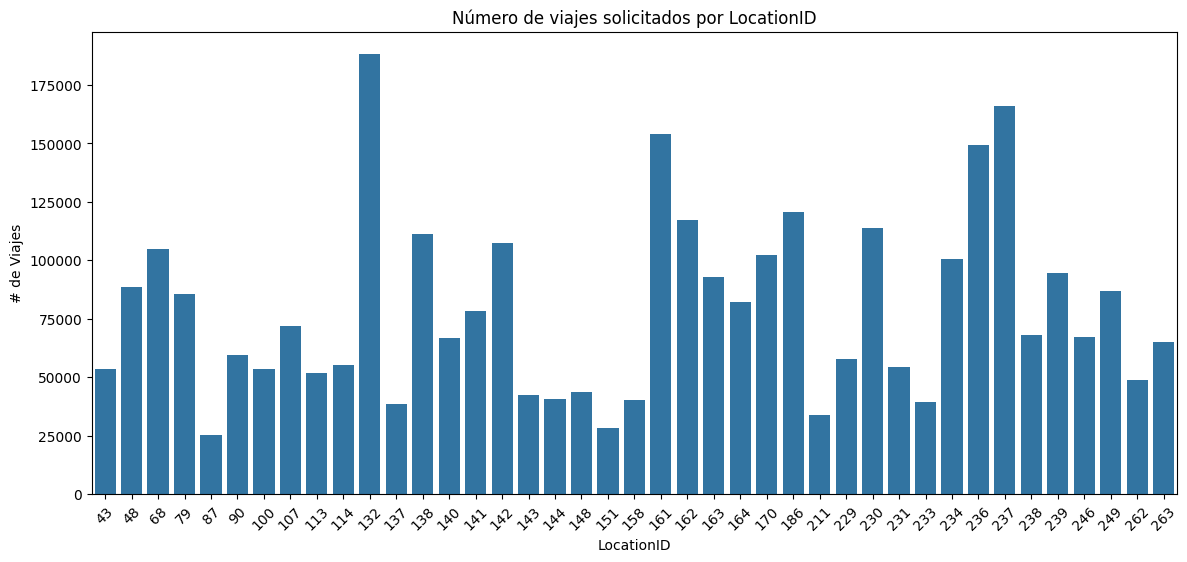

In [35]:
sns.countplot(data=conteo_25000,x='PULocationID')
plt.title('Número de viajes solicitados por LocationID') 
plt.xlabel('LocationID')
plt.ylabel('# de Viajes')
plt.xticks(rotation=45)
plt.show()

### Para la calidad del dato se evaluaran si las filas se pueded considerar como correctas o no. Para ello, además de descartar valores erróneos como ceros y negativos, también se tomaran en cuenta la distancia y el tiempo

### Una distancia de 100 mi puede ser razonable, pero dependera de otro factor como el tiempo, y viceversa. Para ello se creará una columna que calcule la velocidad promedio, lo cual es un valor que nos puede indicar lo razonable de la información tanto de la distancia como del tiempo a la vez.

In [36]:
yellow_tripdata_sample['trip_time_hours'] = (yellow_tripdata_sample['tpep_dropoff_datetime']-yellow_tripdata_sample['tpep_pickup_datetime'])/pd.Timedelta(hours=1)
yellow_tripdata_sample['trip_time_hours']

0          0.653333
1          0.068889
2          0.160278
3          0.264444
4          0.312222
             ...   
3633025    0.561944
3633026    1.202778
3633027    0.149722
3633028    0.449722
3633029    0.385278
Name: trip_time_hours, Length: 3633027, dtype: float64

In [37]:
yellow_tripdata_sample['speed_mph'] = yellow_tripdata_sample['trip_distance']/yellow_tripdata_sample['trip_time_hours']
yellow_tripdata_sample['speed_mph'].describe()

count    3.631955e+06
mean              inf
std               NaN
min     -9.696000e+03
25%      6.397997e+00
50%      8.898876e+00
75%      1.241174e+01
max               inf
Name: speed_mph, dtype: float64

### Se observa que hay valores negativos e incluso infinitos. Se filtrara usando valores razonables. El rango seleccionado es un minimo de 2 mph y un máximo de 50 mph.

In [38]:
speed_2_50 = yellow_tripdata_sample[(yellow_tripdata_sample['speed_mph']>=2)&(yellow_tripdata_sample['speed_mph']<=50)]

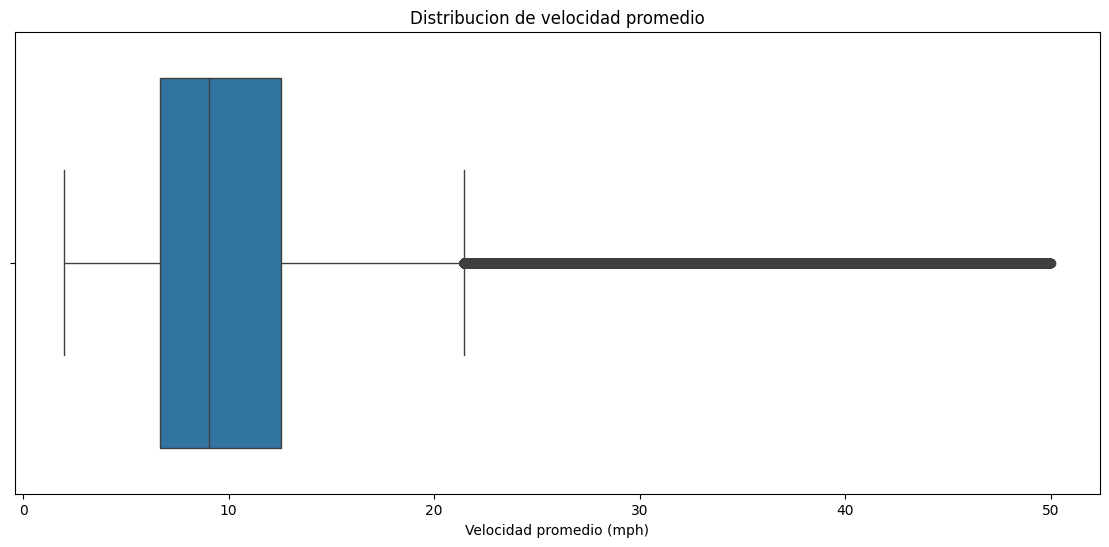

In [39]:
sns.boxplot(x=speed_2_50['speed_mph'])
plt.title('Distribucion de velocidad promedio') 
plt.xlabel('Velocidad promedio (mph)')
plt.show()

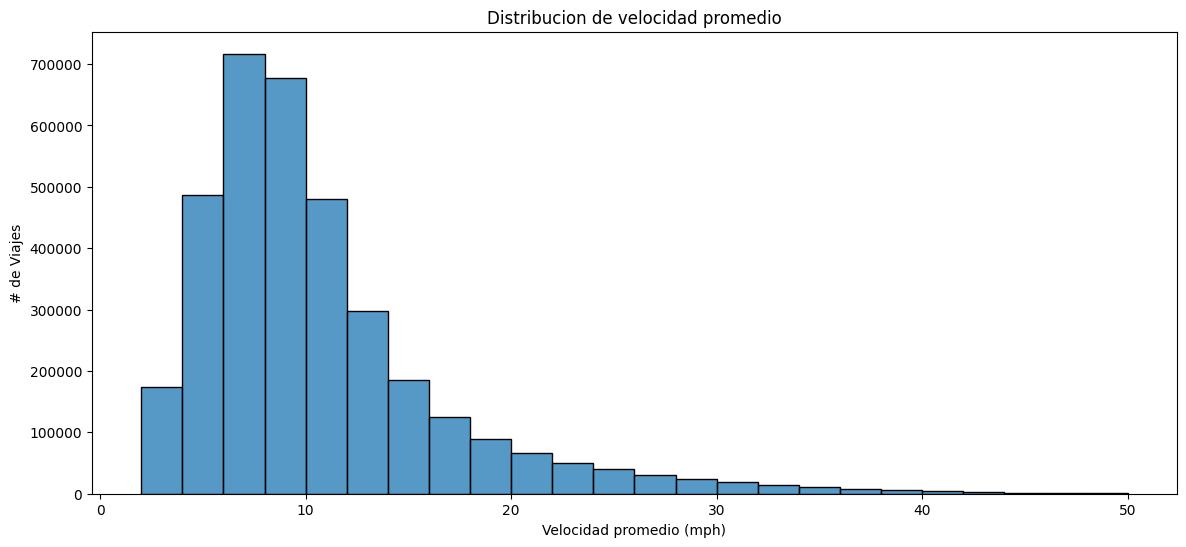

In [40]:
sns.histplot(data=speed_2_50['speed_mph'], binwidth=2)
plt.title('Distribucion de velocidad promedio') 
plt.xlabel('Velocidad promedio (mph)')
plt.ylabel('# de Viajes')
plt.show()

In [41]:
speed_2_50['speed_mph'].describe()

count    3.516520e+06
mean     1.062943e+01
std      6.213380e+00
min      2.000000e+00
25%      6.640578e+00
50%      9.058568e+00
75%      1.256905e+01
max      5.000000e+01
Name: speed_mph, dtype: float64

### Se observa una distribucion donde el 50% de los viajes oscilan a una velocidad promedio entre 6.64 y 12.57 mph.
### Esta información se utilizará para filtrar la data y ver que porcentaje de los datos se considera de calidad.

In [42]:
quality_rows = yellow_tripdata_sample[
    (yellow_tripdata_sample['speed_mph']>=2)&
    (yellow_tripdata_sample['speed_mph']<=50)&
    (yellow_tripdata_sample['fare_amount']>0)&
    (yellow_tripdata_sample['total_amount']>0)
    ].shape[0]

discarded_rows = yellow_tripdata_sample.shape[0]-quality_rows

### Acá se contabilizan las filas que se consideran de calidad y aquellas que han sido descartadas bajo el criterio de velocidad promedio y tarifas 0 o negativas.

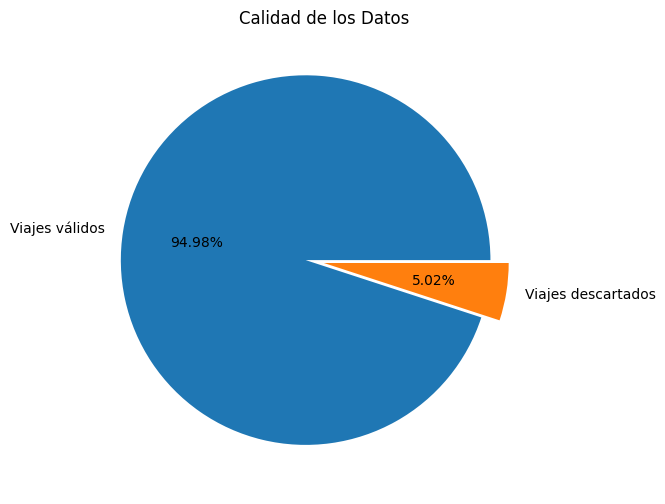

In [43]:
data = [quality_rows, discarded_rows]
keys = ['Viajes válidos', 'Viajes descartados']
plt.title('Calidad de los Datos') 
plt.pie(data, labels=keys,explode=[0.1,0], autopct='%.2f%%')
plt.show()

## Se tiene que luego de los filtros realizados, casi un 95% de la data es de calidad.